In [5]:
import pandas as pd

In [6]:
complaints_df = pd.read_csv("../data/complaints.csv")
complaints_df

,Consumer complaint narrative,Issue
0,My name is XXXX XXXX this complaint is not mad...,Incorrect information on your report
1,I searched on XXXX for XXXXXXXX XXXX and was ...,Fraud or scam
2,I have a particular account that is stating th...,Incorrect information on your report
3,I have not supplied proof under the doctrine o...,Attempts to collect debt not owed
4,Hello i'm writing regarding account on my cred...,Incorrect information on your report
...,...,...
353427,Collections account I have no knowledge of,Attempts to collect debt not owed
353428,"Dear CFPB Team, The reason for my complaint is...",Attempts to collect debt not owed
353429,FRCA violations : Failing to Follow Debt Dispu...,Attempts to collect debt not owed
353430,"My Father, a XXXX XXXX acquired an HECM rever...",Struggling to pay mortgage


In [7]:
issue_counts = complaints_df["Issue"].value_counts()
print(issue_counts)

Incorrect information on your report    229305
Attempts to collect debt not owed        73163
Communication tactics                    21243
Struggling to pay mortgage               17374
Fraud or scam                            12347
Name: Issue, dtype: int64


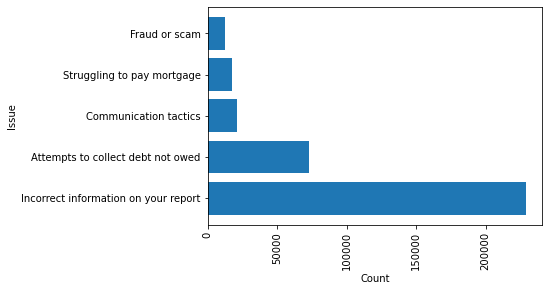

In [8]:
import matplotlib.pyplot as plt

plt.barh(issue_counts.index, issue_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Count")
plt.ylabel("Issue")
plt.show()

In [9]:
avg_length = complaints_df['Consumer complaint narrative'].str.len().mean()
print(avg_length)

1029.6670080807623


In [10]:
avg_length_by_classification = complaints_df.groupby('Issue')['Consumer complaint narrative'].apply(lambda x: x.str.len().mean())
print("The average length of complaint grouped by classification is:\n", avg_length_by_classification)

The average length of complaint grouped by classification is:
 Issue
Attempts to collect debt not owed       1000.366401
Communication tactics                    751.250294
Fraud or scam                           1360.773953
Incorrect information on your report     982.515222
Struggling to pay mortgage              1880.483711
Name: Consumer complaint narrative, dtype: float64


In [11]:
word_count = complaints_df['Consumer complaint narrative'].str.split().apply(len).sum()
char_count = complaints_df['Consumer complaint narrative'].str.len().sum()
print("The total word count of complaints is:", word_count)
print("The total character count of complaints is:", char_count)

The total word count of complaints is: 64920688
The total character count of complaints is: 363917270


In [12]:
import nltk
import pandas as pd
import re

# Get the list of stopwords
stopwords_list = nltk.corpus.stopwords.words('english')

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Issue', 'Words', 'Frequency'])

# Loop over each issue
for issue in complaints_df['Issue'].unique():
    # Filter the data to include only the current issue
    issue_df = complaints_df[complaints_df['Issue'] == issue]
    
    # Remove stopwords and special characters from the text
    issue_df['Consumer complaint narrative'] = issue_df['Consumer complaint narrative'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))
    issue_df['Consumer complaint narrative'] = issue_df['Consumer complaint narrative'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords_list and not word.startswith('x')))
    
    # Get the most common words
    words = nltk.FreqDist(issue_df['Consumer complaint narrative'].str.cat(sep=' ').split())
    top_words = pd.DataFrame(words.most_common(5), columns=['Words', 'Frequency'])
    top_words['Issue'] = issue
    results_df = results_df.append(top_words, ignore_index=True)
    
    # Get the most common bigrams
    bigrams = nltk.FreqDist(list(nltk.bigrams(issue_df['Consumer complaint narrative'].str.cat(sep=' ').split())))
    top_bigrams = pd.DataFrame(bigrams.most_common(5), columns=['Words', 'Frequency'])
    top_bigrams['Words'] = top_bigrams['Words'].apply(lambda x: ' '.join(word for word in x if word != 'xxxx'))
    top_bigrams['Words'] = top_bigrams['Words'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))
    top_bigrams['Issue'] = issue
    results_df = results_df.append(top_bigrams, ignore_index=True)
    
    # Get the most common trigrams
    trigrams = nltk.FreqDist(list(nltk.trigrams(issue_df['Consumer complaint narrative'].str.cat(sep=' ').split())))
    top_trigrams = pd.DataFrame(trigrams.most_common(5), columns=['Words', 'Frequency'])
    top_trigrams['Words'] = top_trigrams['Words'].apply(lambda x: ' '.join(word for word in x if word != 'xxxx'))
    top_trigrams['Words'] = top_trigrams['Words'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))
    top_trigrams['Issue'] = issue
    results_df = results_df.append(top_trigrams, ignore_index=True)

#Display results_df
pd.set_option("display.max_rows", None)
results_df

KeyboardInterrupt: 

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Issue, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Issue))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(complaints['Consumer complaint narrative'], complaints['Issue'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
# Define a function to tokenize a string
def tokenize_string(string):
    return nltk.word_tokenize(string)

# Apply the function to the 'strings' column
complaints['complaint_tokens'] = complaints['Consumer complaint narrative'].apply(tokenize_string)

# Output the result
print(complaints['complaint_tokens'])

Keras Modeling

In [13]:
from sklearn.model_selection import train_test_split

X = complaints_df[['Consumer complaint narrative']]
y = complaints_df['Issue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Big G Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam

# Define the RNN model
sequence_length = 10
num_features = X_train.shape[2]
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, num_features)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, testidation_data=(X_test, y_test))

# Evaluate the model on the test set
mse = model.etestuate(X_test, y_test)

# Make predictions on new data
y_pred = model.predict(X_test)

Tokenizer Keras

In [33]:
X = complaints_df['Consumer complaint narrative']
y = complaints_df['Issue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train

311966    Incorrect information on your report
336446    Incorrect information on your report
245715       Attempts to collect debt not owed
151559    Incorrect information on your report
114611    Incorrect information on your report
                          ...                 
119879       Attempts to collect debt not owed
259178                   Communication tactics
131932    Incorrect information on your report
146867    Incorrect information on your report
121958       Attempts to collect debt not owed
Name: Issue, Length: 282745, dtype: object

In [38]:
X = complaints_df['Consumer complaint narrative']
y = complaints_df['Issue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, Sequential, optimizers
from sklearn.preprocessing import LabelBinarizer

# Create a tokenizer to vectorize text data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

encoder = LabelBinarizer().fit(y_train)
y_train = encoder.transform(y_train).ravel()

encoder = LabelBinarizer().fit(y_test)
y_test = encoder.transform(y_test).ravel()

# Convert text data to sequences of integers
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


pad sequences

In [39]:
# Pad sequences to ensure all sequences have the same length
max_length = 200
X_train = pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post')

model

In [40]:
# Define the RNN model
num_features = len(tokenizer.word_index) + 1
model = Sequential()
model.add(layers.Embedding(num_features, 64, input_length=max_length))
model.add(layers.LSTM(64))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(len(encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 64)           4832832   
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 4,866,181
Trainable params: 4,866,181
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose = 1)

ValueError: Data cardinality is ambiguous:
  x sizes: 282745
  y sizes: 1413725
Make sure all arrays contain the same number of samples.

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

Keras Pretrained Notebook

In [ ]:
!pip install -q --upgrade keras-nlp tensorflow

install from terminal

Digits Notebook

tokenize

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

X = complaints_df['Consumer complaint narrative']
y = complaints_df['Issue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the target labels as integers
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
num_classes = len(le.classes_)

# Define the input shape of your data
input_shape = X_train.shape[1]

# Define your model architecture
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv1D(32, kernel_size=3, activation="relu"),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred))

Digits Notebook

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf

vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2))
X = vectorizer.fit_transform(complaints_df['Consumer complaint narrative'])

# Sort the indices in the sparse matrix
#X = tf.sparse.reorder(X)

y = complaints_df['Issue']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the sparse matrix to a dense matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

# Define the Keras model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

convert to array or tensorflow sparsetensor (sparsereorder)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')